In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../dataset/subsample.csv')
G = nx.read_gml('../network/reviews_network.gml')

In [16]:
G.number_of_edges()

292833

In [17]:
G.number_of_nodes()

27076

In [18]:
u, v, data = list(G.edges(data=True))[0]
data

{'rating': 5, 'neg': 0.08, 'neu': 0.764, 'pos': 0.156, 'compound': 0.4738}

In [20]:
df.head()

,rating,parent_asin,user_id,main_category,average_rating,rating_number,price,neg,neu,pos,compound
0,5,B0887P21Z2,AHGAOIZVODNHYMNCBV4DECZH42UQ,computers,4.8,48733.0,76.48,0.08,0.764,0.156,0.4738
1,5,B0BPN2DXC1,AHGAOIZVODNHYMNCBV4DECZH42UQ,computers,4.6,20671.0,54.98,0.00,1.000,0.000,0.0000
2,1,B09JKYBVJD,AHGAOIZVODNHYMNCBV4DECZH42UQ,computers,4.3,6168.0,85.99,0.00,0.859,0.141,0.6808
3,5,B008GVOVK0,AHGAOIZVODNHYMNCBV4DECZH42UQ,home audio & theater,4.0,14281.0,10.49,0.00,0.891,0.109,0.8061
4,5,B00TOVTZ7K,AHGAOIZVODNHYMNCBV4DECZH42UQ,home audio & theater,4.5,26636.0,18.79,0.00,0.280,0.720,0.8834


In [9]:
G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'product'][0]]

{'type': 'product',
 'main_category': 'computers',
 'average_rating': 4.8,
 'rating_number': 48733.0,
 'price': 76.48}

In [10]:
print( G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'user'][0]])

{'type': 'user'}


<Axes: title={'center': 'pos'}, xlabel='rating'>

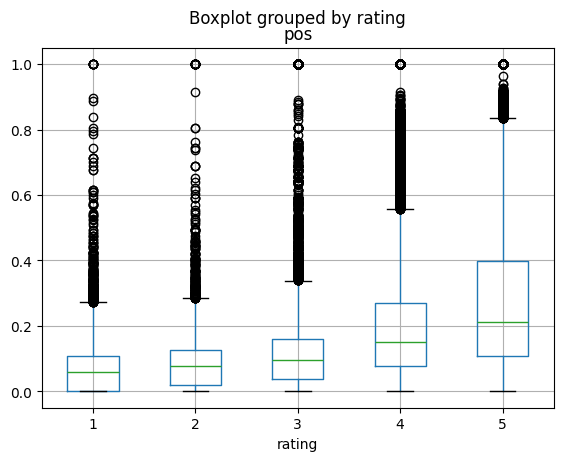

In [11]:
df.boxplot(column=['pos'], by='rating') 

<Axes: title={'center': 'neg'}, xlabel='rating'>

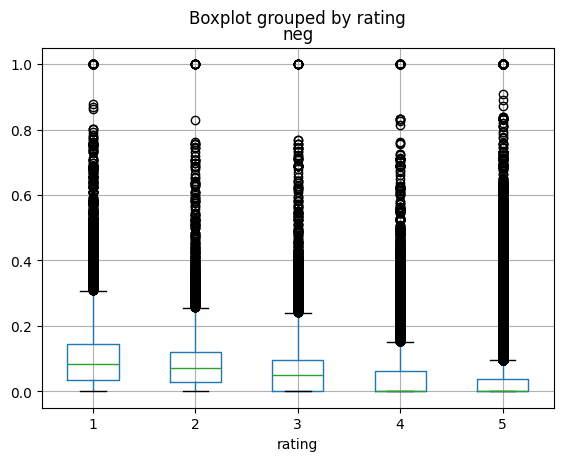

In [12]:
df.boxplot(column=['neg'], by='rating') 

<Axes: title={'center': 'neu'}, xlabel='rating'>

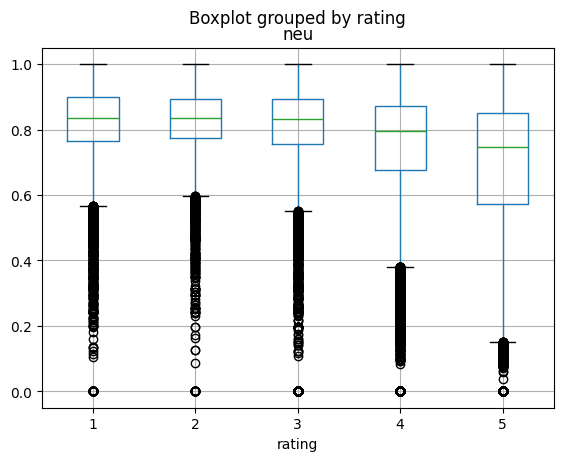

In [13]:
df.boxplot(column=['neu'], by='rating') 

<Axes: title={'center': 'compound'}, xlabel='rating'>

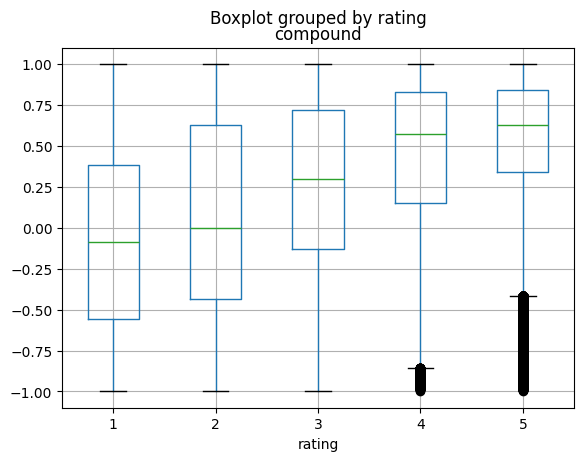

In [12]:
df.boxplot(column=['compound'], by='rating') 

<Axes: title={'center': 'rating_number'}, xlabel='rating'>

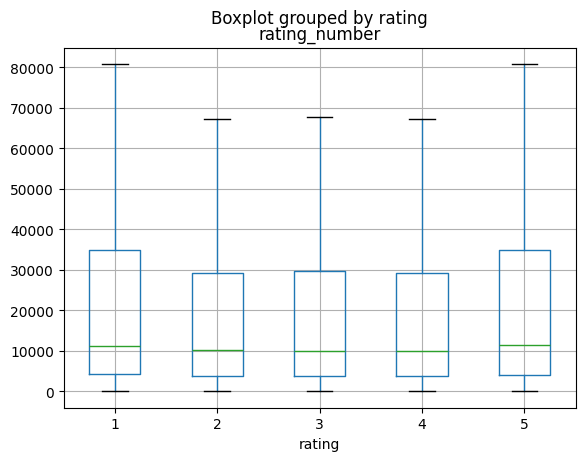

In [13]:
df.boxplot(column=['rating_number'], by='rating',  showfliers=False) 

<Axes: title={'center': 'price'}, xlabel='rating'>

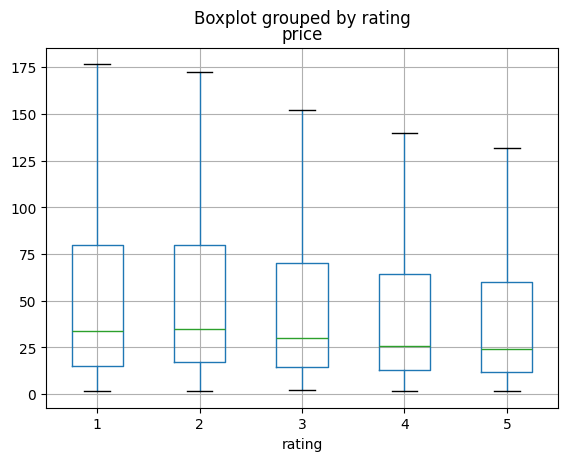

In [14]:
df.boxplot(column=['price'], by='rating', showfliers=False) 

<Axes: title={'center': 'average_rating'}, xlabel='rating'>

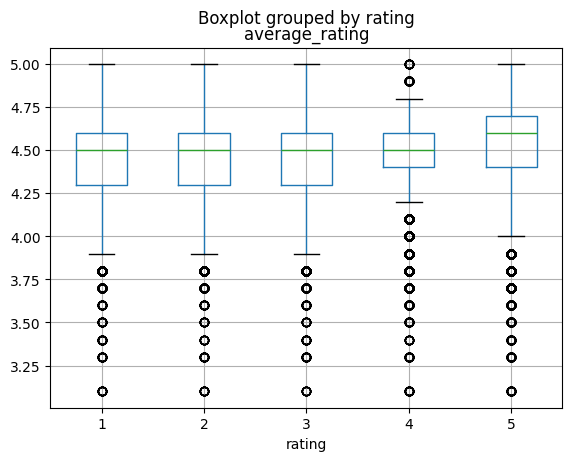

In [15]:
df.boxplot(column=['average_rating'], by='rating') 

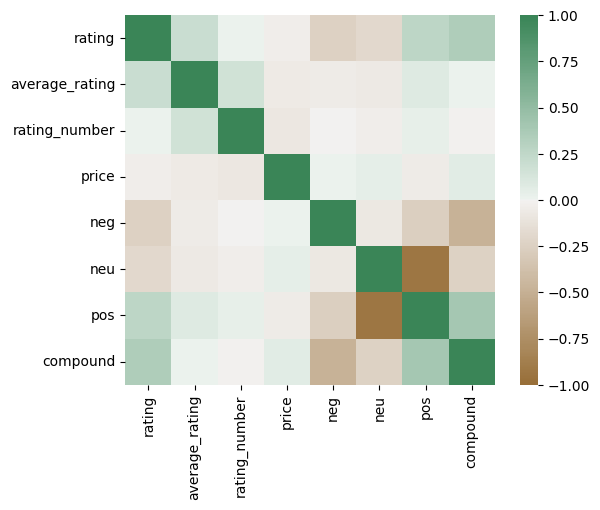

In [16]:
axis_corr = sns.heatmap(
df.drop(columns=['main_category', 'parent_asin', 'user_id']).corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)